In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

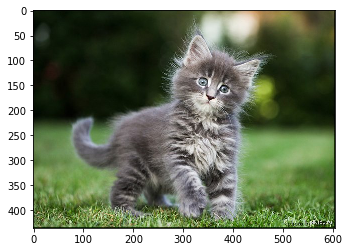

In [2]:
%matplotlib inline
Img = mpimg.imread("kit.jpg")
plt.imshow(Img)

In [3]:
print(Img.shape)

(436, 604, 3)


In [4]:
import random as rnd

def transforming_the_image(text, img):
    img_r = img.reshape(-1,3)
    im = img_r
    #print(text+'00100011')
    for i in range(1,len(text+'00100011')):
        #print(int((text+'00100011')[i-1]),int(sum(img_r[i])) % 2, i-1)
        if int((text+'00100011')[i-1]) == int(sum(img_r[i])) % 2:
            continue
        else:
            img_r[i][rnd.randint(0,2)] += 1
    return img_r.reshape(img.shape)

In [5]:
from tqdm import tqdm_notebook as bar

def extracting_from_image(img):
    img_r = img.reshape(-1,3)
    arr = np.array([x for x in range(1,len(img_r))])
    for i in bar(range(1,len(img_r)-1)):
        arr[i] = int(sum(img_r[i])) % 2
    return arr[1:]

In [6]:
def append(text,k = 8):
    if len(text) != 8:
        x = ""
        for i in range(8-len(text)):
            x += '0'
        text = x+text
    return text

In [7]:
def to_bin(text): #Результат: 1100001 1100010 1100011 
    res = ""
    for i in text:
        res += append(bin(ord(i))[2:])
    return res

In [8]:
def to_chr(bin_text):
    arr = ''
    for i in range(0,len(bin_text),8):
        arr += str(chr(int(bin_text[i:i+8], 2)))
    return arr

In [9]:
def extract_from_extracted(ex_text, finish = '00100011'):
    x = ''
    for i in ex_text:
        x += str(i)
    for i in range(0,len(x),8):
        if x[i:i+7] == finish:
            x = x[:i]
    return x

In [10]:
st = to_bin('Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers.')
print(st)

0100010101100001011000110110100000100000011011010110111101101110011101000110100000101100001000000110111101110110011001010111001000100000001101010011000000100000011011010110100101101100011011000110100101101111011011100010000001100100011001010111011001100101011011000110111101110000011001010111001001110011001000000110001101101111011011010110010100100000011101000110111100100000010100110111010001100001011000110110101100100000010011110111011001100101011100100110011001101100011011110111011100100000011101000110111100100000011011000110010101100001011100100110111000101100001000000111001101101000011000010111001001100101001000000111010001101000011001010110100101110010001000000110101101101110011011110111011101101100011001010110010001100111011001010010110000100000011000010110111001100100001000000110001001110101011010010110110001100100001000000111010001101000011001010110100101110010001000000110001101100001011100100110010101100101011100100111001100101110


In [11]:
Img_tr = transforming_the_image(st, Img)


In [12]:
ex_out = extracting_from_image(Img_tr)
out = extract_from_extracted(ex_out, '00100011'[:-1])
print(out)


0100010101100001011000110110100000100000011011010110111101101110011101000110100000101100001000000110111101110110011001010111001000100000001101010011000000100000011011010110100101101100011011000110100101101111011011100010000001100100011001010111011001100101011011000110111101110000011001010111001001110011001000000110001101101111011011010110010100100000011101000110111100100000010100110111010001100001011000110110101100100000010011110111011001100101011100100110011001101100011011110111011100100000011101000110111100100000011011000110010101100001011100100110111000101100001000000111001101101000011000010111001001100101001000000111010001101000011001010110100101110010001000000110101101101110011011110111011101101100011001010110010001100111011001010010110000100000011000010110111001100100001000000110001001110101011010010110110001100100001000000111010001101000011001010110100101110010001000000110001101100001011100100110010101100101011100100111001100101110


In [13]:
to_chr(out)

'Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers.'

In [17]:
mpimg.imsave('KittyCoded.png', Img_tr)

In [18]:
Img_tr.shape

(436, 604, 3)